In [3]:
!pip install -r ../requirements.txt



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
def choose_year(df, year:int):
    if year == 1:
        df = df.iloc[:10]
    elif year == 2:
        df = df.iloc[10:20]
    elif year == 3:
        df = df.iloc[20:30]
    else:
        df = df.iloc[30:40]
    return df

In [2]:
def marks_by_subject_bars(df, year:int):
    df_subset = choose_year(df, year)

    if year == 1:
        df_subset = df.iloc[:10]
    elif year == 2:
        df_subset = df.iloc[10:20]
    elif year == 3:
        df_subset = df.iloc[20:30]
    else:
        df_subset = df.iloc[30:40]

    x = df_subset['Subject']
    y = pd.to_numeric(df_subset['Mark'], errors='coerce')
    fields = df_subset['Field']

    unique_fields = fields.unique()
    colors = sns.color_palette("husl", len(unique_fields))  
    field_color_map = dict(zip(unique_fields, colors))
    bar_colors = fields.map(field_color_map)
    
    fig, ax = plt.subplots()
    ax.bar(x, y, color=bar_colors)

    ax.set_ylim(0, 10)
    ax.set_ylabel('Marks')
    ax.set_title('Marks by Subject Year ' + str(year))
    plt.xticks(rotation=45, ha='right', rotation_mode='default')  
    
    handles = [plt.Rectangle((0,0),1,1, color=field_color_map[field]) for field in unique_fields]
    ax.legend(handles, unique_fields, title='Field')

    fig.tight_layout()
    plt.show()

In [3]:
def marks_by_subject_lines(df, year:int):
    df_subset = choose_year(df, year)

    x = df_subset['Subject']
    y = pd.to_numeric(df_subset['Mark'], errors='coerce')
    fields = df_subset['Field']

    unique_fields = fields.unique()
    colors = sns.color_palette("husl", len(unique_fields))  
    field_color_map = dict(zip(unique_fields, colors))
    
    marker_colors = fields.map(field_color_map)
    
    fig, ax = plt.subplots()

    ax.plot(x, y, marker='o', linestyle='-', color='b', alpha=0.5)  

    for i, (subject, mark, color) in enumerate(zip(x, y, marker_colors)):
        ax.plot(subject, mark, marker='o', color=color, markersize=8)

    ax.set_ylim(0, 10)
    ax.set_ylabel('Marks')
    ax.set_title('Marks by Subject Year ' + str(year))
    plt.xticks(rotation=45, ha='right', rotation_mode='default')

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, linestyle='') for color in colors]
    ax.legend(handles, unique_fields, title='Field')

    fig.tight_layout()
    plt.show()

In [8]:
df = pd.read_excel('dataset.xlsx')

In [9]:
print(df)

                   Subject  Year Mark          Field   MH Repeated  Credits  \
0                 Calculus     1  7.5           Math   No       No        6   
1                   Fisics     1  7.7         Fisics   No       No        6   
2              Electronics     1  7.8         Fisics   No       No        6   
3            Programming 1     1  7.2    Programming   No       No        6   
4            Discrete Math     1  7.7           Math   No       No        6   
5                  Algebra     1    8           Math   No       No        6   
6               Statistics     1  7.5           Math   No       No        6   
7                 Business     1  9.1          Extra   No       No        6   
8                      OOP     1  9.5    Programming   No       No        6   
9      Computer Technology     1   10       Hardware   No       No        6   
10              Algorithms     2   10    Programming  Yes       No        6   
11               Databases     2  8.7    Programming

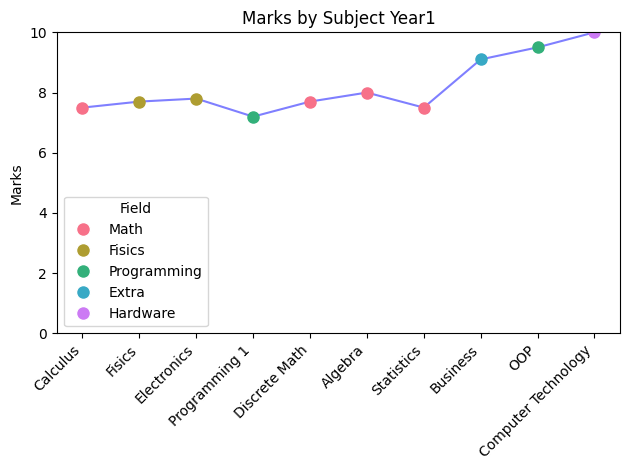

In [16]:
marks_by_subject_lines(df, 1)

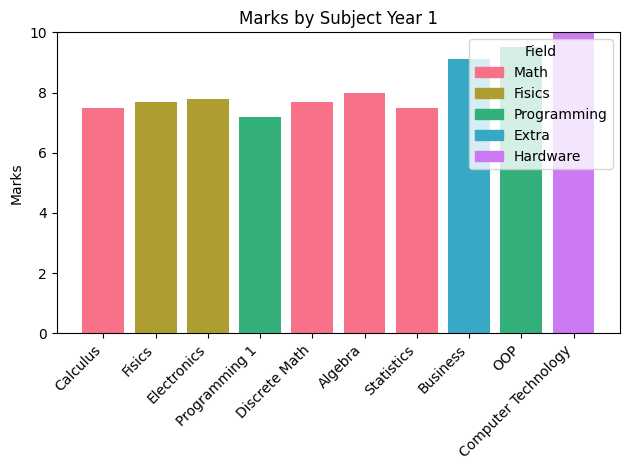

In [10]:
marks_by_subject_bars(df, 1)

In [58]:
def mean_year(df, year:int):
    df_subset = choose_year(df, year)
    media_columna = pd.to_numeric(df_subset['Mark'], errors='coerce').mean()
    return media_columna

In [59]:
mean_year1 = mean_year(df, 1)
mean_year2 = mean_year(df, 2)
mean_year3 = mean_year(df, 3)
mean_year4 = mean_year(df, 4)
mean_expedient = pd.to_numeric(df['Mark'], errors='coerce').mean()
means = [mean_year1, mean_year2, mean_year3, mean_year4]

In [60]:
print(means)
print(mean_expedient)

[np.float64(8.2), np.float64(8.790000000000001), np.float64(8.54), np.float64(9.0)]
8.525806451612903


In [61]:
def median_year(df, year:int):
    df_subset = choose_year(df, year)
    media_columna = pd.to_numeric(df_subset['Mark'], errors='coerce').median()
    return media_columna

In [62]:
median_year1 = median_year(df, 1)
median_year2 = median_year(df, 2)
median_year3 = median_year(df, 3)
median_year4 = median_year(df, 4)
median_expedient = pd.to_numeric(df['Mark'], errors='coerce').median()
medians = [median_year1, median_year2, median_year3, median_year4]

In [63]:
print(medians)
print(median_expedient)

[np.float64(7.75), np.float64(8.899999999999999), np.float64(8.35), np.float64(9.0)]
8.3
